In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

log_files = {
    "vit_ape": "minist_log/vit_ape.log",
    "vit_ape_reg_rpe": "minist_log/vit_ape_reg_rpe.log",
    "vit_ape_poly_rpe": "minist_log/vit_ape_poly_rpe.log",
    "vit_ape_axial_rope": "minist_log/vit_ape_axial_rope.log",
    "vit_ape_mixed_rope": "minist_log/vit_ape_mixed_rope.log",
}

pattern_train = re.compile(r"Averaged stats: .*?loss: ([\d\.]+) \(")
pattern_test_loss = re.compile(r"\* Acc@1 .*? Acc@5 .*? loss ([\d\.]+)")
pattern_acc1 = re.compile(r"\* Acc@1 ([\d\.]+)")

logs = {}

for name, path in log_files.items():
    train_loss, test_loss, acc1 = [], [], []
    with open(path, "r") as f:
        for line in f:
            if m := pattern_train.search(line):
                train_loss.append(float(m.group(1)))
            if m := pattern_test_loss.search(line):
                test_loss.append(float(m.group(1)))
            if m := pattern_acc1.search(line):
                acc1.append(float(m.group(1)))
    logs[name] = {
        "train_loss": train_loss,
        "test_loss": test_loss,
        "test_acc1": acc1
    }


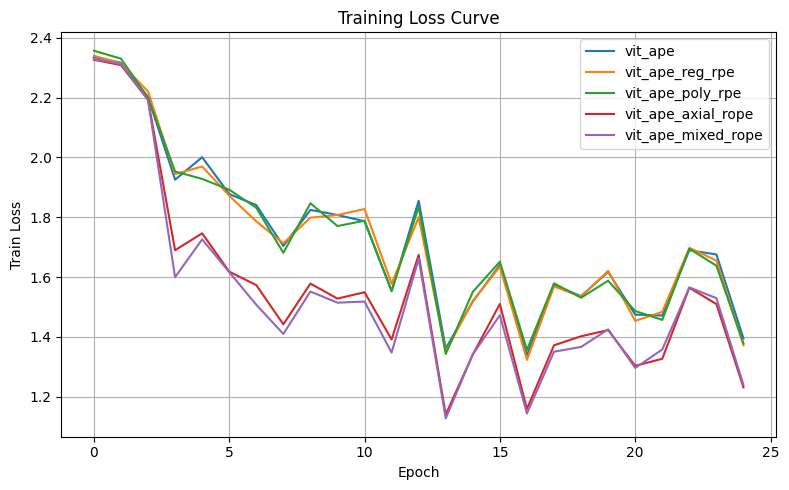

In [3]:
plt.figure(figsize=(8, 5))
for name, values in logs.items():
    plt.plot(values["train_loss"], label=name)
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

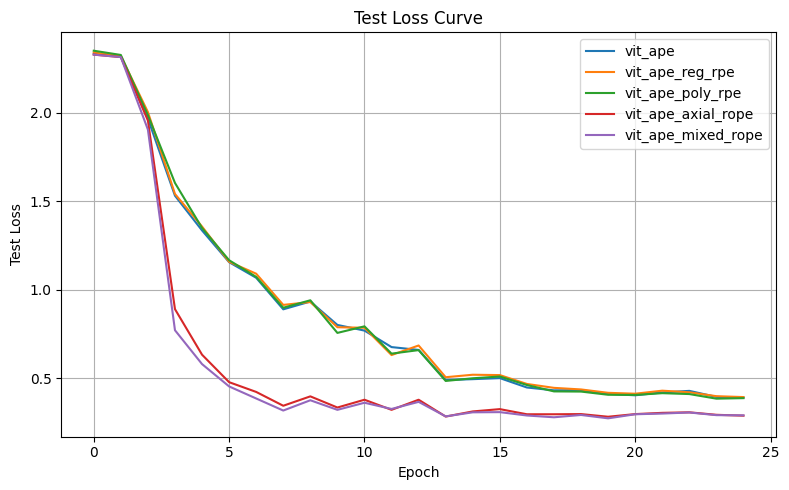

In [4]:
plt.figure(figsize=(8, 5))
for name, values in logs.items():
    plt.plot(values["test_loss"], label=name)
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.title("Test Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

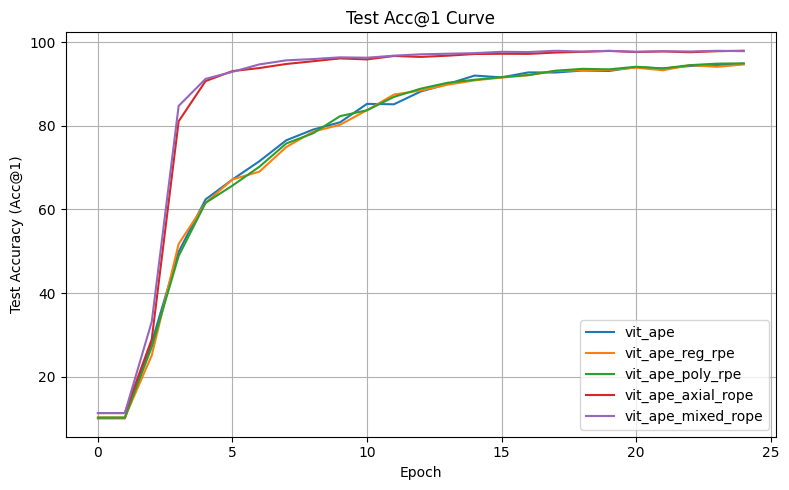

In [5]:
plt.figure(figsize=(8, 5))
for name, values in logs.items():
    plt.plot(values["test_acc1"], label=name)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (Acc@1)")
plt.title("Test Acc@1 Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()